The Radon transform is available in Python as `radon` in the `skimage.transform` library. To study the ill-posedness of the inverse problem, we first build an explicit matrix representation of the Radon transform in `getK`.

1. Construct the matrix for `nx = 32` and plot the left and right singular vectors and singular values.
2. Generate noisy data and apply the regularised pseudo-inverse (`np.linalg.pinv`), selecting an appropriate regularisation parameter for various noise levels
3. Explain how regularisation both reduces noise and limits the resolution of the resulting image
4. Can you think of a type of noise for which the usual regularisation will not work?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import radon
from skimage.data import binary_blobs
from skimage.draw import disk

In [ ]:
def getK(nx):
    """
    Get explicit matrix representation of the Radon transform for an nx by nx image.

    input:
        nx - dimension of the input image
        theta - array with angles (in degrees)

    output:
        K - matrix of size nd*nt by nx*nx, with nd = int(np.sqrt(2)*nx)+1
    """
    theta = np.linspace(0,180,nx)
    nd = int(np.sqrt(2)*nx)+1
    N = nx**2
    M = nd*nx
    K = np.zeros((M,N))
    for i in range(nx**2):
        ei = np.zeros(nx**2)
        ei[i] = 1
        K[:,i] = radon(np.reshape(ei,(nx,nx)), theta=theta, circle = False).ravel()
    return K

def getPhantom(nx, r = 0.9):
    """
    Define phantom image.

    input:
        nx - dimension of the input image
        r - radius of phantom, optional (default = 0.9)

    output:
        u - phantom image as 1d array of length nx*nx
    """
    # mask
    mask = np.zeros((nx,nx))
    ii,jj = disk((nx//2,nx//2),r * (nx//2))
    mask[ii,jj] = 1

    # binary blobs
    u = 0.5 * np.float64(binary_blobs(length=nx, blob_size_fraction=0.5))
    u += 0.5 * np.float64(binary_blobs(length=nx, blob_size_fraction=0.2))
    u *= mask

    # return
    return u.ravel()

def plot_image(u,nx,ax=[],title=''):
    """
    plot image
    """
    if not ax:
        fig, ax = plt.subplots()

    ax.imshow(u.reshape((nx,nx)),extent=(0,1,0,1))
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(title)

def plot_sinogram(f,nx, ax=[],title=''):
    """
    plot sinogram
    """
    nd = len(f) // nx

    if not ax:
        fig, ax = plt.subplots()
    ax.imshow(f.reshape((nd,nx)),extent=(0,3.14,0,1.5))
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$s$')
    ax.set_aspect(2)
    ax.set_title(title)

In [ ]:
# settings
nx    = 32
sigma = 1e-3

# get matrix
K = getK(nx)

# get phantom
ut = getPhantom(nx)

# generate data
f = K@ut + sigma*np.random.randn(K.shape[0])

# reconstruct
ur = np.linalg.pinv(K, rcond=1e-3)@f

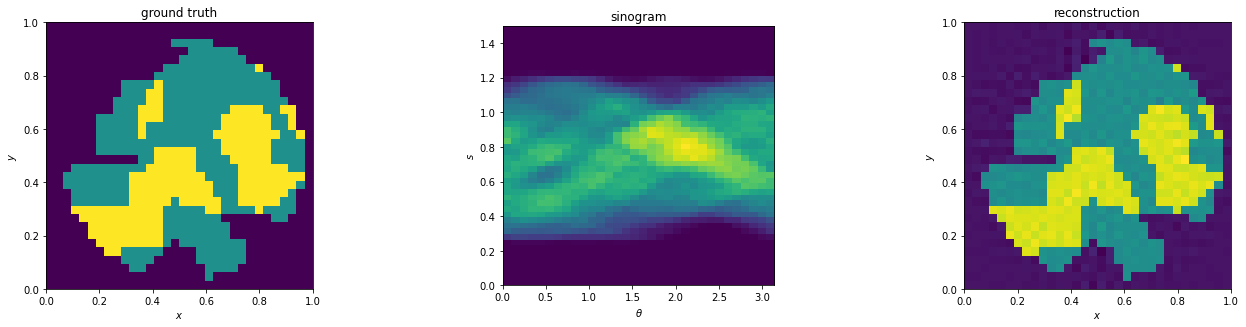

In [ ]:
fig,ax = plt.subplots(1,3)

plot_image(ut,nx,ax=ax[0],title='ground truth')
plot_sinogram(f,nx,ax=ax[1], title='sinogram')
plot_image(ur,nx,ax=ax[2],title='reconstruction')

fig.tight_layout()
fig.set_figwidth(20)